# Gaiola Automatizada - Lab Dig II

---

## Configurações

### Instalar dependencias:

In [1]:
pip install paho-mqtt

### Definir credenciais

In [2]:
user = "grupo2-bancadaB2"
passwd = "L@Bdygy2B2"

### Define classe estática para maestrar Dashboard

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

class Maestro(object):
    mensagem = ""
    gaiolas = {}
    
    @staticmethod
    def atualiza_gaiolas():
        msg = Maestro.mensagem.split("-")
        codigo = msg[0]
        estado = msg[1]
        distancia1 = int(msg[2]) if len(msg) > 2 else " - " 
        distancia2 = int(msg[3]) if len(msg) > 3 else " - "
        
        Maestro.gaiolas[codigo] = {"Código": codigo, "Estado": estado, "Distância 1": distancia1 if type(distancia1) == int else 0, "Distância 2": distancia2 if type(distancia2) == int else 0}
        
        estado_desc = "Inativo" if estado == "0" else "Armado" if estado == "2" else "Fechado" if estado == "5" else "NaN"
        
        print(f"Gaiola: {codigo} | Estado: {estado_desc:<7} | Distância 1: {distancia1:>3} cm | Distância 2: {distancia2:>3} cm ", flush=True)
        
        Maestro.mensagem = ""

    
    @staticmethod
    def monta_tabela(ref = None):           
        df = pd.DataFrame(Maestro.gaiolas).transpose()
        df.drop('Código', axis=1, inplace=True)
        df["Estado"] = df["Estado"].apply(
            lambda estado: "Inativo" if estado == "0" else "Armado" if estado == "2" else "Fechado" if estado == "5" else "NaN"
        )
        if ref:
            df.sort_values(by=[ref], inplace=True)
        display(df)
    
    @staticmethod
    def exibe_grafico():
        try:
            df = pd.DataFrame(Maestro.gaiolas).transpose()
            df["Estado Descrição"] = df["Estado"].apply(
                lambda estado: "Inativo" if estado == "0" else "Armado" if estado == "2" else "Fechado" if estado == "5" else "NaN"
            )
            df.groupby('Estado Descrição')['Código'].nunique().plot(kind='pie', title="Estados das Gaiolas", xlabel="", ylabel="")
            plt.show()
            
            df.drop(df[df['Estado'] != '2'].index, inplace = True)

            plt.hist(df['Distância 1'], label='Distância Interna', alpha=.85, edgecolor='black', bins=4)
            plt.hist(df['Distância 2'], label='Distância na Porta', alpha=.6, edgecolor='black', bins=4)
            plt.legend()
            plt.show()
        except:
            print("Sem gaiolas")
        
        

### Define cliente para conexão

In [27]:
import paho.mqtt.client as mqtt
        
broker = "3.141.193.238"            
port = 80                           
keepAlive = 60                      
topico = user+"/TX"

def on_connect(client, userdata, flags, rc):
    print("Conectado com codigo " + str(rc))
    client.subscribe(topico, qos=0)

# Exemplo mensagem: 01-2-030-015
def on_message(client, userdata, msg):
    caracter = msg.payload.decode("utf-8")
    if caracter == ".":
        Maestro.atualiza_gaiolas()
    else:
        Maestro.mensagem += caracter


client = mqtt.Client()        
client.on_connect = on_connect              
client.on_message = on_message              
client.username_pw_set(user, passwd)        
client.connect(broker, port, keepAlive)

0

---
---
---

# Teste de Dashboard Mockado

### Mocka gaiolas:

In [5]:
Maestro.mensagem = "01-2-030-015"
Maestro.atualiza_gaiolas()
Maestro.mensagem = "02-0"
Maestro.atualiza_gaiolas()
Maestro.mensagem = "03-2-145-68"
Maestro.atualiza_gaiolas()
Maestro.mensagem = "04-2-088-027"
Maestro.atualiza_gaiolas()
Maestro.mensagem = "05-5"
Maestro.atualiza_gaiolas()
Maestro.mensagem = "06-0"
Maestro.atualiza_gaiolas()
Maestro.mensagem = "07-5"
Maestro.atualiza_gaiolas()
Maestro.mensagem = "08-2-143-089"
Maestro.atualiza_gaiolas()
Maestro.mensagem = "09-2-099-010"
Maestro.atualiza_gaiolas()
Maestro.mensagem = "10-0"
Maestro.atualiza_gaiolas()

Gaiola: 01 | Estado: Armado  | Distância 1:  30 cm | Distância 2:  15 cm 
Gaiola: 02 | Estado: Inativo | Distância 1:  -  cm | Distância 2:  -  cm 
Gaiola: 03 | Estado: Armado  | Distância 1: 145 cm | Distância 2:  68 cm 
Gaiola: 04 | Estado: Armado  | Distância 1:  88 cm | Distância 2:  27 cm 
Gaiola: 05 | Estado: Fechado | Distância 1:  -  cm | Distância 2:  -  cm 
Gaiola: 06 | Estado: Inativo | Distância 1:  -  cm | Distância 2:  -  cm 
Gaiola: 07 | Estado: Fechado | Distância 1:  -  cm | Distância 2:  -  cm 
Gaiola: 08 | Estado: Armado  | Distância 1: 143 cm | Distância 2:  89 cm 
Gaiola: 09 | Estado: Armado  | Distância 1:  99 cm | Distância 2:  10 cm 
Gaiola: 10 | Estado: Inativo | Distância 1:  -  cm | Distância 2:  -  cm 


### Gera Tabela

In [6]:
Maestro.monta_tabela()

,Estado,Distância 1,Distância 2
01,Armado,30,15
02,Inativo,0,0
03,Armado,145,68
04,Armado,88,27
05,Fechado,0,0
06,Inativo,0,0
07,Fechado,0,0
08,Armado,143,89
09,Armado,99,10
10,Inativo,0,0


### Atualizam gaiolas

In [7]:
Maestro.mensagem = "01-5"
Maestro.atualiza_gaiolas()
Maestro.mensagem = "05-0"
Maestro.atualiza_gaiolas()
Maestro.mensagem = "06-2-048-078"
Maestro.atualiza_gaiolas()
Maestro.mensagem = "09-5"
Maestro.atualiza_gaiolas()

Gaiola: 01 | Estado: Fechado | Distância 1:  -  cm | Distância 2:  -  cm 
Gaiola: 05 | Estado: Inativo | Distância 1:  -  cm | Distância 2:  -  cm 
Gaiola: 06 | Estado: Armado  | Distância 1:  48 cm | Distância 2:  78 cm 
Gaiola: 09 | Estado: Fechado | Distância 1:  -  cm | Distância 2:  -  cm 


### Nova tabela

In [8]:
Maestro.monta_tabela()

,Estado,Distância 1,Distância 2
01,Fechado,0,0
02,Inativo,0,0
03,Armado,145,68
04,Armado,88,27
05,Inativo,0,0
06,Armado,48,78
07,Fechado,0,0
08,Armado,143,89
09,Fechado,0,0
10,Inativo,0,0


### Exibe gráfico

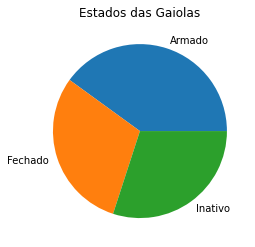

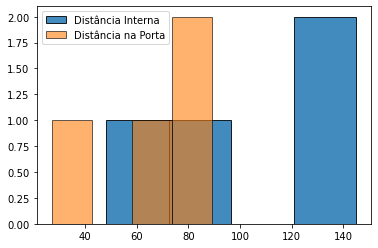

In [9]:
Maestro.exibe_grafico()

---
---
---

# Monitoração

### Faz a conexão e recebe em loop

In [ ]:
print("========================================")
print("Terminal Receptor Serial")
print("========================================")
client.loop_forever()

Terminal Receptor Serial
Conectado com codigo 0
Gaiola: 01 | Estado: Inativo | Distância 1:   0 cm | Distância 2:   0 cm 
Gaiola: 01 | Estado: Armado  | Distância 1:  54 cm | Distância 2:  19 cm 
Gaiola: 01 | Estado: Fechado | Distância 1:   0 cm | Distância 2:   0 cm 
Gaiola: 01 | Estado: Inativo | Distância 1:   0 cm | Distância 2:   0 cm 
Gaiola: 01 | Estado: Armado  | Distância 1:  53 cm | Distância 2:  19 cm 
Gaiola: 01 | Estado: Inativo | Distância 1:   0 cm | Distância 2:   0 cm 
Gaiola: 01 | Estado: Fechado | Distância 1:   0 cm | Distância 2:   0 cm 


### Tabela

In [14]:
Maestro.monta_tabela()

,Distância 1,Distância 2,Estado
01,0,0,Fechado


In [15]:
Maestro.monta_tabela("Estado")

,Distância 1,Distância 2,Estado
01,0,0,Fechado


In [ ]:
Maestro.monta_tabela("Distância 1")

In [ ]:
Maestro.monta_tabela("Distância 2")

### Gráficos

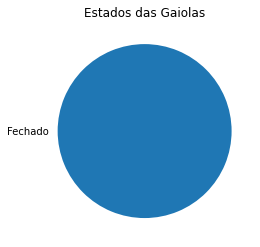

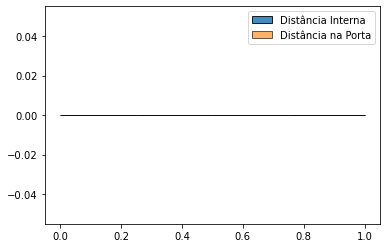

In [16]:
Maestro.exibe_grafico()

---
---
---


# Controle Remoto

In [17]:
import time

---

## Controle Geral

### Reset

In [18]:
client.loop_start()
client.publish(user+"/E0", payload="1", qos=0, retain=False)
time.sleep(1)
client.publish(user+"/E0", payload="0", qos=0, retain=False)
client.loop_stop()

Gaiola: 01 | Estado: Inativo | Distância 1:   0 cm | Distância 2:   0 cm 


### Armar

In [25]:
client.loop_start()
client.publish(user+"/E1", payload="1", qos=0, retain=False)
time.sleep(1)
client.publish(user+"/E1", payload="0", qos=0, retain=False)
client.loop_stop()

Gaiola: 01 | Estado: Fechado | Distância 1:   0 cm | Distância 2:   0 cm 


### Desarmar

In [20]:
client.loop_start()
client.publish(user+"/E2", payload="1", qos=0, retain=False)
time.sleep(1)
client.publish(user+"/E2", payload="0", qos=0, retain=False)
client.loop_stop()

Gaiola: 01 | Estado: Armado  | Distância 1:  53 cm | Distância 2:  19 cm 


---

## Controle Individual

Especifique qual gaiola deseja controlar:

In [21]:
gaiola = "01"

tempo_aguardo = 0.2

### Reset

In [22]:
client.loop_start()
client.publish(user+"/RX", payload=gaiola[0], qos=0, retain=False)
time.sleep(tempo_aguardo)
client.publish(user+"/RX", payload=gaiola[1], qos=0, retain=False)
time.sleep(tempo_aguardo)
client.publish(user+"/RX", payload="-", qos=0, retain=False)
time.sleep(tempo_aguardo)
client.publish(user+"/RX", payload="R", qos=0, retain=False)
client.loop_stop()

Gaiola: 01 | Estado: Fechado | Distância 1:   0 cm | Distância 2:   0 cm 


### Armar

In [23]:
client.loop_start()
client.publish(user+"/RX", payload=gaiola[0], qos=0, retain=False)
time.sleep(tempo_aguardo)
client.publish(user+"/RX", payload=gaiola[1], qos=0, retain=False)
time.sleep(tempo_aguardo)
client.publish(user+"/RX", payload="-", qos=0, retain=False)
time.sleep(tempo_aguardo)
client.publish(user+"/RX", payload="A", qos=0, retain=False)
client.loop_stop()

### Desarmar

In [24]:
client.loop_start()
client.publish(user+"/RX", payload=gaiola[0], qos=0, retain=False)
time.sleep(tempo_aguardo)
client.publish(user+"/RX", payload=gaiola[1], qos=0, retain=False)
time.sleep(tempo_aguardo)
client.publish(user+"/RX", payload="-", qos=0, retain=False)
time.sleep(tempo_aguardo)
client.publish(user+"/RX", payload="D", qos=0, retain=False)
client.loop_stop()

Gaiola: 01 | Estado: Armado  | Distância 1:  54 cm | Distância 2:  19 cm 
